<a href="https://colab.research.google.com/github/TAN-07/Data-Warehousing-Mining/blob/main/DMW_MiniProject/DMW_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

B.E.-B 15 Tanvi Nirmal  B.E.-B 17 Sakshi Thorat

#**DMW Mini Project**

Mini project on classification: Consider a labeled dataset belonging to an application domain. Apply suitable data preprocessing steps such as handling of null values, data reduction, discretization. For prediction of class labels of given data instances, build classifier models using different techniques (minimum 3), analyze the confusion matrix and compare these models. Also apply cross validation while preparing the training and testing datasets.

#**Project Title : Heart Disease Risk Prediction**

Dataset Contains:
```
* age     : age in years
* sex     : (1 = male; 0 = female)
* cp      : chest pain type
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol    : serum cholestoral in mg/dl
* fbs     : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang   : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope   : the slope of the peak exercise ST segment
* ca      : number of major vessels (0-3) colored by flourosopy
* thal    : thalium stress reult 1,3 = normal; 6 = fixed defect; 7 = reversable defect
* target  : have disease or not (1,2,3,4=yes, 0=no) (= the predicted attribute)
```



#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Dataset**

In [ ]:
#This dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
df = pd.read_csv("cleveland.csv")

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#**Data Exploration**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:
#There are only 6 cells with null values. So, imputing them.
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})

In [ ]:
df.target.value_counts()

0    163
1    139
Name: target, dtype: int64

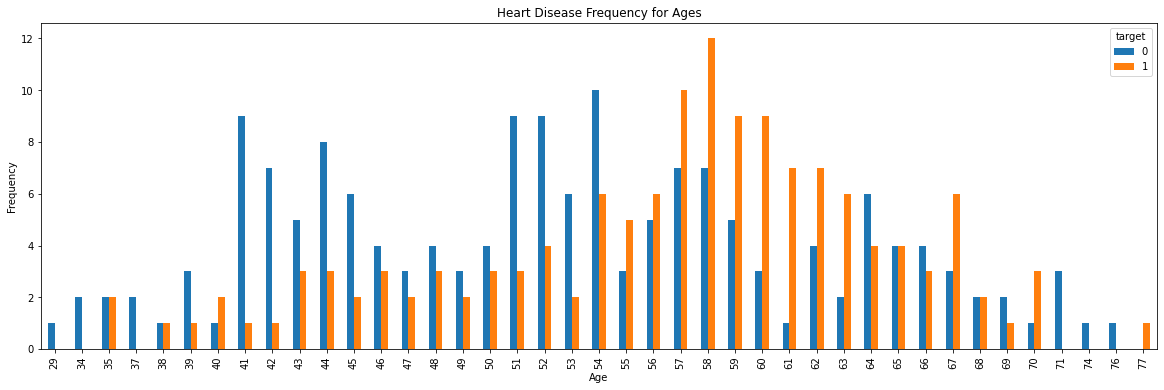

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

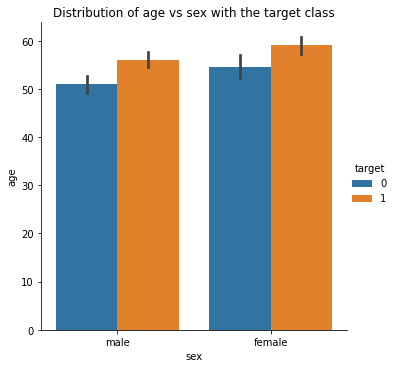

In [ ]:
sns.catplot(kind='bar', data=df, x='sex',y='age',hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [ ]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})         

#**Data Preprocessing**



In [ ]:
#Creating Dummy Variables
#Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,cp_4,thal_3.0,thal_4.73,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,67,1,160,286,0,2,108,1,1.5,3.0,1,0,0,0,1,1,0,0,0,0,1,0
1,67,1,120,229,0,2,129,1,2.6,2.0,1,0,0,0,1,0,0,0,1,0,1,0
2,37,1,130,250,0,0,187,0,3.5,0.0,0,0,0,1,0,1,0,0,0,0,0,1
3,41,0,130,204,0,2,172,0,1.4,0.0,0,0,1,0,0,1,0,0,0,1,0,0
4,56,1,120,236,0,0,178,0,0.8,0.0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#Splitting of Dataset

In [ ]:
#Splitting of dataset to 80% - 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#**Building Classifier Models**

In [ ]:
#For Storing the accuracies obtained by employing various ML models
accuracies = {}

#*Support Vector Classifier*

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

SV = SVC(kernel = 'linear')
SV.fit(X_train, y_train)

# Predicting the Test set results
y_predSV = SV.predict(X_test)

In [ ]:
#Classification Reports
print("CLASSIFICATION REPORT:\n"+classification_report(y_predSV,y_test))
accuracies['SVM'] = SV.score(X_test,y_test)*100

cm_SV = confusion_matrix(y_predSV,y_test)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.88        29

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
cv_results = cross_val_score(SV, X , y, cv=5)
print (cv_results)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)), 
      "\nStandard deviation: {}".format(np.std(cv_results)))

[0.83606557 0.90163934 0.78333333 0.81666667 0.78333333]
Average 5-Fold CV Score: 0.8242076502732241 
Standard deviation: 0.04366821175189989


#*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

# Predicting the test set results
y_pred_testLR = LR.predict(X_test)

In [ ]:
#Classification Reports
print("CLASSIFICATION REPORT:\n"+classification_report(y_pred_testLR,y_test))
accuracies['Logistic Regression'] = LR.score(X_test,y_test)*100

cm_LR = confusion_matrix(y_test,y_pred_testLR)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.84      0.88        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
cv_results = cross_val_score(LR, X , y, cv=5)
print (cv_results)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)), 
      "\nStandard deviation: {}".format(np.std(cv_results)))

[0.85245902 0.85245902 0.8        0.83333333 0.75      ]
Average 5-Fold CV Score: 0.8176502732240436 
Standard deviation: 0.03887762129716553


#*Naive Bayes Classifier*

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predicting the Test set results
y_pred_testGNB = GNB.predict(X_test)

In [ ]:
#Classification Reports
print("CLASSIFICATION REPORT:\n"+classification_report(y_pred_testGNB,y_test))
accuracies['Naive Bayes'] = GNB.score(X_test,y_test)*100

cm_NB = confusion_matrix(y_pred_testGNB,y_test)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.81      0.85        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
cv_results = cross_val_score(GNB, X , y, cv=5)
print (cv_results)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)), 
      "\nStandard deviation: {}".format(np.std(cv_results)))

[0.78688525 0.6557377  0.81666667 0.88333333 0.66666667]
Average 5-Fold CV Score: 0.7618579234972677 
Standard deviation: 0.08798808619088798


#*Random Forest Classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 1000,random_state=1)
RF.fit(X_train, y_train)

# Predicting the Test set results
y_pred_RF = RF.predict(X_test)

In [ ]:
#Classification Report
print("CLASSIFICATION REPORT:\n"+classification_report(y_pred_RF,y_test))
accuracies['Random Forest'] = RF.score(X_test,y_test)*100

cm_RF = confusion_matrix(y_pred_RF,y_test)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.81      0.85        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
cv_results = cross_val_score(RF, X , y, cv=5)
print (cv_results)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)), 
      "\nStandard deviation: {}".format(np.std(cv_results)))

[0.83606557 0.90163934 0.8        0.8        0.78333333]
Average 5-Fold CV Score: 0.8242076502732241 
Standard deviation: 0.04237689944412704


#*K-Nearest Neighbour Classification*

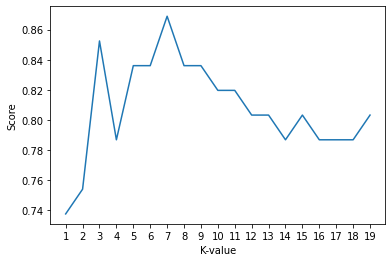

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#to find best k value
scoreList = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scoreList.append(knn.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K-value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors means the highest value of k.Here, k=7
KNN.fit(X_train, y_train)

y_pred_KNN = KNN.predict(X_test)

print("CLASSIFICATION REPORT:\n"+classification_report(y_test, y_pred_KNN))

cm_KNN = confusion_matrix(y_pred_KNN,y_test)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#**Comparing the Models**

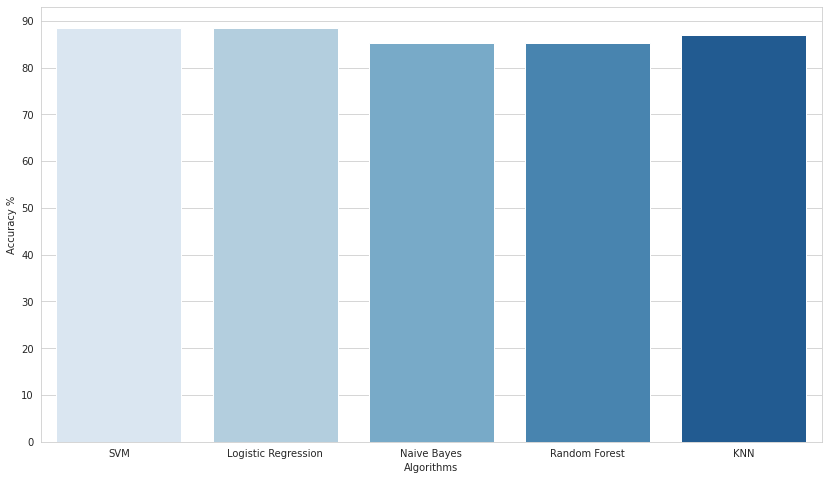

In [ ]:
#Accuracy Comparison

sns.set_style("whitegrid")
plt.figure(figsize=(14,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Blues')
plt.show()

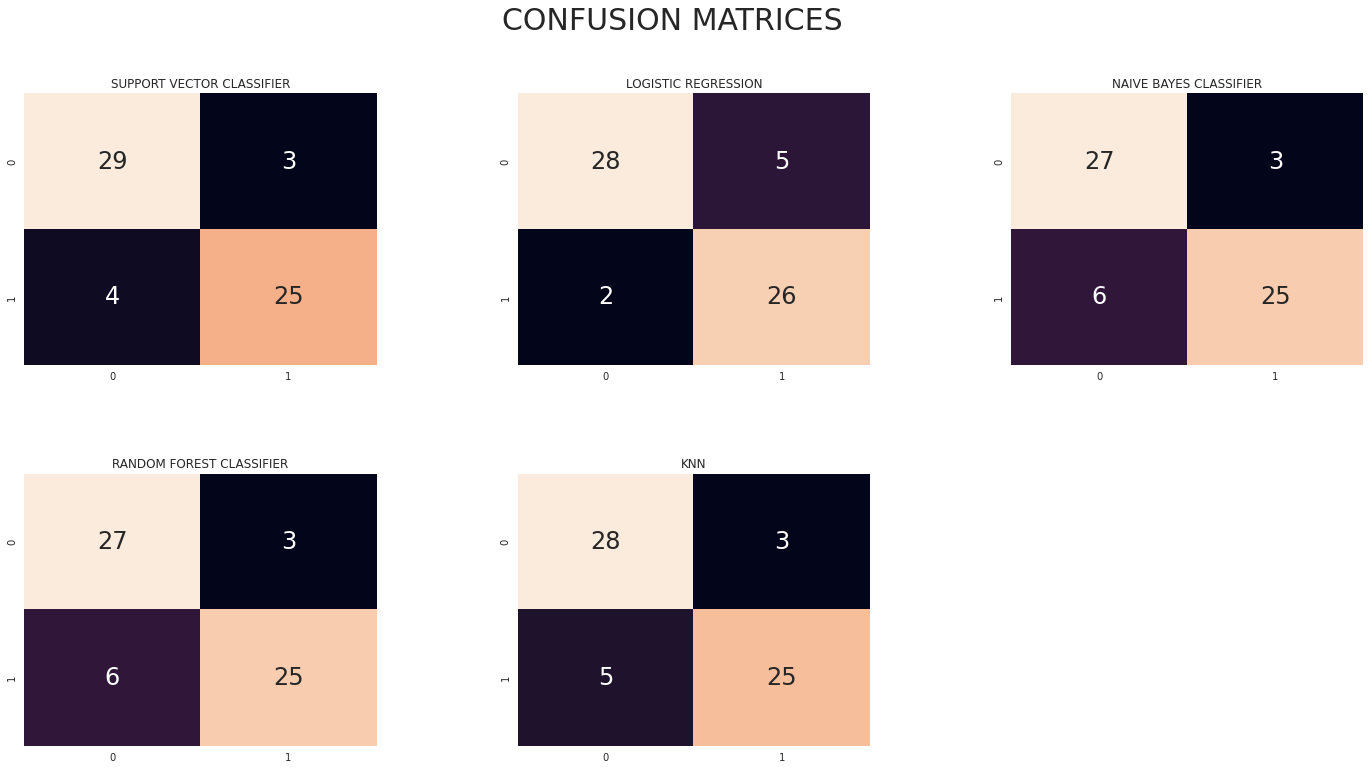

In [ ]:
#Comparison on Confusion Matrices

plt.figure(figsize=(24,12))

plt.suptitle("CONFUSION MATRICES",fontsize = 30)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("SUPPORT VECTOR CLASSIFIER")
sns.heatmap(cm_SV,annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("LOGISTIC REGRESSION")
sns.heatmap(cm_LR,annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("NAIVE BAYES CLASSIFIER")
sns.heatmap(cm_NB,annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("RANDOM FOREST CLASSIFIER")
sns.heatmap(cm_RF,annot=True,fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("KNN")
sns.heatmap(cm_KNN,annot=True,fmt="d",cbar=False, annot_kws={"size": 24})